# Проект:

# Исследование объявлений о продаже квартир

## Задание 1. Исследование

Посмотрим на общую информацию по нашим данным.

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Посмотрим в каких столбцах есть пропущенные значения.

Оценим какой процент пропущенные данные составляют по каждому столбцу.

In [3]:
len_data = len(data)
(data.isna().sum() / len(data)*100).sort_values(ascending=False)

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
ponds_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
first_day_exposition     0.000000
last_price               0.000000
total_area               0.000000
studio                   0.000000
rooms                    0.000000
floor                    0.000000
open_plan                0.000000
total_images             0.000000
dtype: float64

В 88% продаваемых квартир не указано являются ли они апартаментами. Вероятнее всего не являются и при занесении объявления, пользователи просто игнорировали это поле. Заменим в этом столбце NaN на False.

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Есть пропущенные значения в высоте потолков, этажности здания, жилой площади и площадь кухни, метрах до центра города, парков, аэропортов и ближайших водоемов. Не будем их выдумывать. Оставим данные как есть.

Если пользователь не указал число балконов, скорее всего, балкона нет совсем. Заменим отсутствующие значения в этом столбце на нули.

In [9]:
data[['balcony']] = data[['balcony']].fillna(0)

<font style="color:green; font-size:200%">✓</font> С пропущенными заначениями разобрались.

Приведем столбец с датой публикации к формату даты.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Приведем столбцы с количеством балконов к цельночисленным значениям.

In [16]:
data[['balcony']] = data[['balcony']].astype('int')

<font style="color:green; font-size:200%">✓</font> Привели данные к соответствующим типам.

<font style="color:Aquamarine; font-size:200%">•</font> Посчитаем и добавим в таблицу цену квадратного метра,

In [17]:
data['price_per_meter'] = data['last_price'] / data['total_area']

<font style="color:Aquamarine; font-size:200%">•</font> отдельные колонки с днем недели, месяцем и годом публикации,

In [18]:
data['week_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

<font style="color:Aquamarine; font-size:200%">•</font> разобъем этажи на три категории: "первый", "последний", "другой",

In [19]:
def categorize_floor(data):
    
    floor = data['floor']
    floors_total = data['floors_total']
    
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

data['floor_category'] = data.apply(categorize_floor, axis=1)

<font style="color:Aquamarine; font-size:200%">•</font> добавим соотношение жилой к общей площади, а также отношение площади кухни к общей площади

In [20]:
data['ratio_living_to_total'] = data['living_area'] / data['total_area']
data['ratio_kitchen_to_total'] = data['kitchen_area'] / data['total_area']

С помощью этих коэффициентов мы сможем понять, насколько сбалансирована планировка квартиры.  
Отношение жилой площади к общей обычно находится в рекомендованном промежутке от 0,5 до 0,7. В комфортабельных квартирах он ближе к нижней границе, в более экономичных – к верхней.  
Отношение площади кухни к общей площади изучим в нашем наборе данных.

## Задание 2. Переходим к исследовательскому анализу.

<font style="color:orange; font-size:400%">•</font>Посмотрим на параметры продаваемых квартир.

In [21]:
pd.options.display.float_format = '{:,.2f}'.format

In [22]:
main_params = ['rooms', 'cityCenters_nearest', 'total_area', 'last_price', 'price_per_meter', 'days_exposition', 'floor']
data[main_params].describe()

,rooms,cityCenters_nearest,total_area,last_price,price_per_meter,days_exposition,floor
count,"23,699.00","18,180.00","23,699.00","23,699.00","23,699.00","20,518.00","23,699.00"
mean,2.07,"14,191.28",60.35,"6,541,548.77","99,421.66",180.89,5.89
std,1.08,"8,608.39",35.65,"10,887,013.27","50,306.80",219.73,4.89
min,0.00,181.00,12.00,"12,190.00",111.83,1.00,1.00
25%,1.00,"9,238.00",40.00,"3,400,000.00","76,585.47",45.00,2.00
50%,2.00,"13,098.50",52.00,"4,650,000.00","95,000.00",95.00,4.00
75%,3.00,"16,293.00",69.90,"6,800,000.00","114,256.33",232.00,8.00
max,19.00,"65,968.00",900.00,"763,000,000.00","1,907,500.00","1,580.00",33.00


<font style="color:orange; font-size:200%">•</font> Средняя стоимость 6,5 млн., медианная 4,6 млн. 
И тут же видим, что максимальная стоимость 763 млн., а минимальная 12 тыс.

Посмотрим на диаграмму размаха.

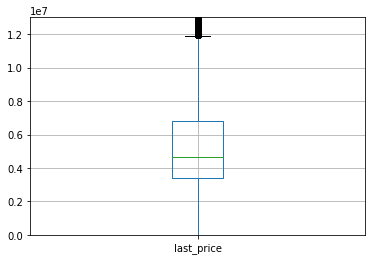

In [24]:
import matplotlib.pyplot as plt 

plt.ylim(0, 13000000)
data[['last_price']].boxplot()

На диаграмме видно, что в межквартильный размах попадают значения от 0 до 12 млн.  
Все значения выше 12 млн. считаем выбросами.  
Чтобы подробнее рассмотреть типовые варианты квартир, <font style="background-color:yellow">следует ограничить выборку до 12 млн.</font>

Посмотрим, сколько всего в выборке дорогих  квартир. Ограничим их стоимость - от 12 млн.

In [25]:
high_price = data.query('last_price > 12000000')
print('Дорогих квартир: {} шт.'.format(len(high_price)))

Дорогих квартир: 1941 шт.


<font style="color:orange; font-size:200%">•</font> Рассмотрим стоимость квадратного метра.

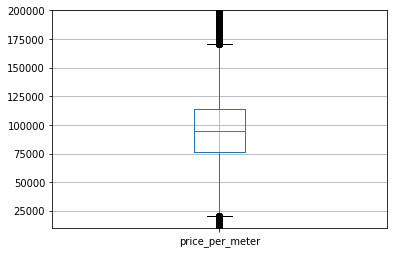

In [26]:
plt.ylim(10000, 200000)
data[['price_per_meter']].boxplot()

<font style="background-color:yellow">В характерный разброс попадают значения от 25 до 175 тыс.</font>

<font style="color:orange; font-size:200%">•</font> Проведем анализ площади продаваемых квартир.

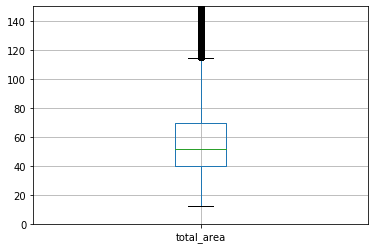

In [27]:
plt.ylim(0, 150)
data[['total_area']].boxplot()

<font style="background-color:yellow">Основная масса продаваемых квартир по площади колеблется между 10 и 115 кв.м.</font>

<font style="color:orange; font-size:200%">•</font> Квартиры с каким количеством комнат представлены в данных?

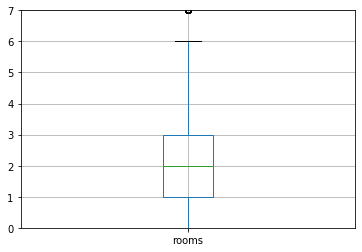

In [28]:
plt.ylim(0, 7)
data[['rooms']].boxplot()

<font style="background-color:yellow">Для типовой выборки ограничим наши данные квартирами от 1 до 6 комнат</font>

Посмотрим на квартиры без комнат.

In [29]:
view_columns = ['rooms', 'cityCenters_nearest', 'locality_name', 'total_area', 'living_area', 'kitchen_area', 'last_price', \
                'price_per_meter', 'days_exposition', 'floor', 'studio', 'open_plan', 'ratio_living_to_total', \
                'ratio_kitchen_to_total']

data[view_columns].query('rooms == 0').sample(5)

,rooms,cityCenters_nearest,locality_name,total_area,living_area,kitchen_area,last_price,price_per_meter,days_exposition,floor,studio,open_plan,ratio_living_to_total,ratio_kitchen_to_total
349,0,nan,деревня Кудрово,25.00,17.00,nan,"2,320,000.00","92,800.00",45.00,1,False,True,0.68,nan
4115,0,"13,330.00",Санкт-Петербург,24.00,18.00,nan,"2,600,000.00","108,333.33",42.00,4,False,True,0.75,nan
9487,0,"11,849.00",Санкт-Петербург,23.40,18.90,nan,"3,200,000.00","136,752.14",135.00,3,True,False,0.81,nan
12996,0,"15,772.00",Санкт-Петербург,18.00,16.00,nan,"1,900,000.00","105,555.56",10.00,3,True,False,0.89,nan
7625,0,"17,492.00",Санкт-Петербург,25.00,18.00,nan,"3,450,000.00","138,000.00",nan,14,True,False,0.72,nan


Комнат нет, но жилая площадь есть, при этом площадь кухни не указана.   
Проверим есть ли квартиры с 0 комнат, не студии и не со свободной планировкой.

In [30]:
len(data[view_columns].query('rooms == 0 & studio != True & open_plan != True'))

0

Таких квартир нет.
Кваритры с 0 комнат это студии или квартиры со свободной планировкой.

<font style="color:orange; font-size:200%">•</font> Как много квартир со свободной планировкой, апартаментов и студий?

In [31]:
data[['is_apartment', 'studio', 'open_plan']].sum()

is_apartment     50
studio          149
open_plan        67
dtype: int64

Апартаментов: 50,  
Студий: 149,  
Квартир со свободной планировкой: 67.

<font style="color:orange; font-size:200%">•</font> Как долго обычно висит объявление о продаже?

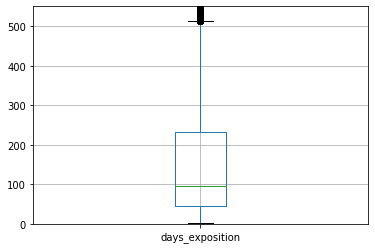

In [32]:
plt.ylim(0, 550)
data[['days_exposition']].boxplot()

<font style="background-color:yellow">Основная масса квартир продается до 510 дней.</font>

<font style="color:orange; font-size:200%">•</font> На каких этажах продают квартиры?

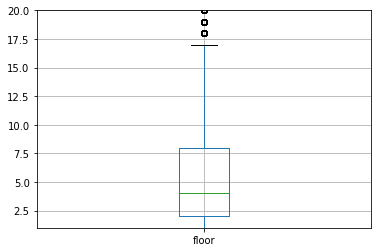

In [33]:
plt.ylim(1, 20)
data[['floor']].boxplot()

В основном продаются квартиры с 1 по 18 этаж.

<font style="color:orange; font-size:200%">•</font> Посмотрим на распределение соотношения жилой площади к общей

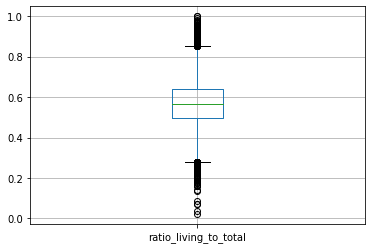

In [34]:
#plt.ylim(0.27, 0.9)
data[['ratio_living_to_total']].boxplot()

В основном встречаются соотношения от 0,3 до 0,8.  
В наших данных есть квартиры с жилой площадью - меньше 0,1% и 100% от общей.

Посмотрим на квартиры с минимальной жилой площадью.

In [35]:
data[view_columns].query('ratio_living_to_total < 0.1')

,rooms,cityCenters_nearest,locality_name,total_area,living_area,kitchen_area,last_price,price_per_meter,days_exposition,floor,studio,open_plan,ratio_living_to_total,ratio_kitchen_to_total
3242,1,"13,073.00",Санкт-Петербург,41.00,3.00,11.00,"4,440,000.00","108,292.68",216.00,17,False,False,0.07,0.27
13915,2,"6,521.00",Санкт-Петербург,52.00,2.00,9.00,"6,350,000.00","122,115.38",91.00,2,False,False,0.04,0.17
21758,0,nan,посёлок Мурино,23.00,2.00,nan,"2,330,000.00","101,304.35",66.00,22,True,False,0.09,nan
21943,4,"11,270.00",Санкт-Петербург,77.60,5.40,9.80,"6,100,000.00","78,608.25",33.00,1,False,False,0.07,0.13
23574,3,"5,975.00",Санкт-Петербург,139.00,3.00,16.00,"64,990,000.00","467,553.96",280.00,8,False,False,0.02,0.12


Например, в строке с индексом 3242 находится 1-комнатная квартира общей площадью 41 метр, с 3 метрами жилой площади и 11 метрами площади кухни. Оставшиеся 27 метров могут занимать: коридоры, ванные, санузлы, встроенные шкафы, кладовые, внутриквартирная лестница, балконы, лоджии и террасы. Есть, где развернуться.  

Посмотрим на квартиры со 100% жилой площадью.

In [36]:
data[view_columns].query('ratio_living_to_total == 1')

,rooms,cityCenters_nearest,locality_name,total_area,living_area,kitchen_area,last_price,price_per_meter,days_exposition,floor,studio,open_plan,ratio_living_to_total,ratio_kitchen_to_total
9861,0,nan,посёлок Мурино,25.00,25.00,nan,"2,350,000.00","94,000.00",13.00,17,False,True,1.00,nan
12691,0,"16,840.00",Санкт-Петербург,24.20,24.20,nan,"3,700,000.00","152,892.56",74.00,13,False,True,1.00,nan


Свободная планировка, нет ванных, туалетов и, похоже, даже кухонь.

<font style="color:orange; font-size:200%">•</font> Посмотрим на распределение соотношения площади кухни к общей площади

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b0eec3310>]],
      dtype=object)

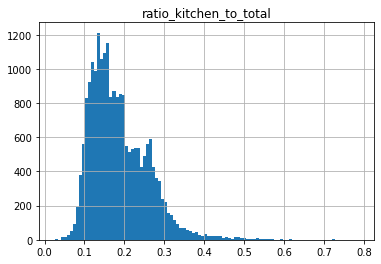

In [37]:
data.hist('ratio_kitchen_to_total', bins=100)

Кое-где кухня занимает 80% площади квартиры.

In [38]:
data[view_columns].query('ratio_kitchen_to_total > 0.7')

,rooms,cityCenters_nearest,locality_name,total_area,living_area,kitchen_area,last_price,price_per_meter,days_exposition,floor,studio,open_plan,ratio_living_to_total,ratio_kitchen_to_total
511,1,nan,посёлок Мурино,69.00,13.00,50.00,"5,950,000.00","86,231.88",56.00,12,False,False,0.19,0.72
1407,1,"16,414.00",Санкт-Петербург,24.60,18.00,18.20,"3,250,000.00","132,113.82",96.00,16,False,False,0.73,0.74
7755,1,nan,поселок Мурино,20.67,14.95,14.95,"1,811,250.00","87,627.00",98.00,13,False,False,0.72,0.72
11579,1,"12,702.00",Санкт-Петербург,33.00,26.00,26.00,"4,300,000.00","130,303.03",180.00,14,False,False,0.79,0.79
12481,3,nan,Коммунар,60.40,nan,43.20,"3,000,000.00","49,668.87",234.00,2,False,False,nan,0.72


В строке с индексом 12481, например, видим 3-х комнатную квартиру общей площадью 60,4 кв.м., 43,2 из которых занимает кухня. На оставшихся 17,2 должны поместиться еще 3 комнаты. Я бы тоже жилую площадь с такими параметрами не стала сразу указывать.

<font style="color:orange; font-size:200%">•</font> Посмотрим на расстояние до центра.

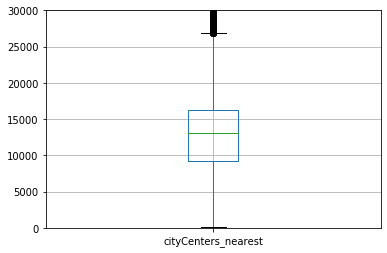

In [39]:
plt.ylim(0, 30000)
data[['cityCenters_nearest']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b0efa6790>]],
      dtype=object)

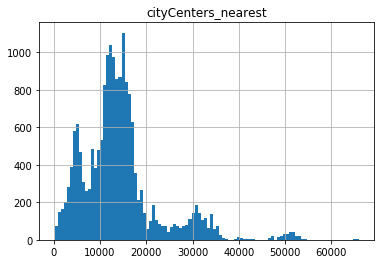

In [40]:
data.hist('cityCenters_nearest', bins=100)

Большинство квартир расположены в пределах 27 км от центра.

Есть небольшой всплеск в районе 50 км.

In [41]:
more_than_50km_data = data.query('cityCenters_nearest > 45000')
more_than_50km_data['locality_name'].value_counts()

Ломоносов             123
Кронштадт              95
Петергоф               24
Зеленогорск            24
посёлок Молодёжное      5
посёлок Репино          1
Name: locality_name, dtype: int64

Там находятся крупные города области. Оставим этот хвост в данных.

Разобъем расстояние до центра на группы.

In [42]:
def Centers_nearest_group(meters):
        if meters <= 6000:
                return '0-6 км'
        if meters <= 10000:
                return '06-10 км'
        if meters <= 20000:
                return '10-20 км'
        if meters <= 30000:
                return '20-30 км'
        if meters <= 40000:
                return '30-40 км'
        if meters <= 50000:
                return '40-50 км'
        if meters > 50000:
                return 'более 50 км'
            
data['Centers_nearest_group'] = data['cityCenters_nearest'].apply(Centers_nearest_group)

<font style="color:green; font-size:400%">•</font> Мы изучаем типовые варианты, поэтому ограничим нашу выборку квартирами стоимостью до 12 млн. руб., площадью от 10 до 115 кв.м., количеством комнат до 6, стоимостью за метр 25-175 тыс., уберем студии, апартаменты и квартиры со свободной планировкой.

In [43]:
standard_data = data.query('last_price < 12000000 & total_area > 10 & total_area < 115 & rooms <= 6 & \
price_per_meter >= 25000 & price_per_meter <= 175000 & studio != True & open_plan != True & is_apartment != True')
print('В типовой выборке осталось: {} квартир.'.format(len(standard_data)))

В типовой выборке осталось: 20835 квартир.


Посмотрим на стоимость метра.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b0ea4f690>]],
      dtype=object)

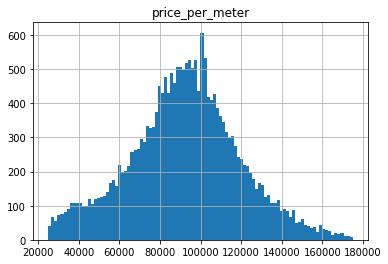

In [44]:
standard_data.hist('price_per_meter', bins=100)

Теперь гистограмма стоимости метра похожа на график нормального распределения.

<font style="color:blue; font-size:400%">•</font>Посмотрим, какие факторы больше всего влияют на стоимость квартиры.

In [45]:
corr_threshold = 0.2
(
    standard_data.corr()[['price_per_meter', 'last_price']]
                 .query('abs(price_per_meter) > @corr_threshold and abs(last_price) > @corr_threshold') 
)

,price_per_meter,last_price
last_price,0.61,1.00
rooms,-0.22,0.46
kitchen_area,0.23,0.48
cityCenters_nearest,-0.40,-0.34
price_per_meter,1.00,0.61


Корреляция есть только между стоимостью квартиры и ценой за кв.м.

<font style="color:blue; font-size:200%">•</font> Зависит ли цена квадратного метра от числа комнат?

Корреляция до 0,2 очень слабая.  
Посмотрим на зависимость стоимости метра от количества комнат.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


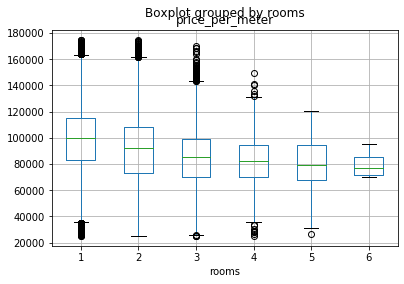

In [47]:
plot = standard_data.boxplot('price_per_meter', by = 'rooms')

На графике видно, что в 1-к квартирах стоимость метра самая высокая.  
И дальше до 6 комнат стоимость за метр падает.  
Нижняя граница до 5 комнат не поднимается выше 40 тыс.за метр, и только в 6-комн. квартирах не опускается ниже 70 тыс.за метр.

<font style="color:blue; font-size:200%">•</font> Зависит ли цена квадратного метра от этажа?

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


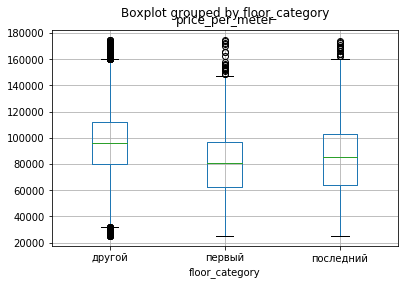

In [49]:
plot = standard_data.boxplot('price_per_meter', by = 'floor_category')

Первый и последний этажи стоят дешевле, чем другие.  
Кватиры на первом этаже дешевле квартир на последнем.  
Верхняя граница стоимости за метр квартир на первом этаже не поднимается выше 150 тыс.за метр, в то время, как на последнем и других этажах находится примерно на одном уровне ~160 тыс.

<font style="color:blue; font-size:200%">•</font> Зависит ли цена квадратного метра от удаленности от центра?

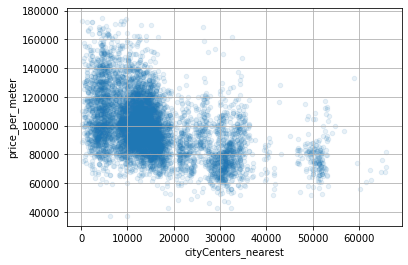

In [52]:
plot = (
    standard_data.pivot_table(index = 'cityCenters_nearest', 
                              values = 'price_per_meter', 
                              aggfunc = 'median')
                 .reset_index() #извлекаем    cityCenters_nearest из индекса
                 .plot(x = 'cityCenters_nearest', 
                       y = 'price_per_meter', 
                       kind = 'scatter', 
                       alpha = 0.1, 
                       grid = True)
)

При удалении от центра стоимость квадратного метра постепенно уменьшается.  
Верхний порог цен со 180 тыс. в пределах 6 км от центра, опускается ниже 100 тыс. в 50 км.
При этом нижний порог цен изменяется не так значительно, как верхний. Стоимость в 6 км от центра начинается от 75 тыс., а в 50 км от 60 тыс.  


<font style="color:blue; font-size:200%">•</font> Зависит ли цена квадратного метра от даты размещения: дня недели, месяца, года?

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


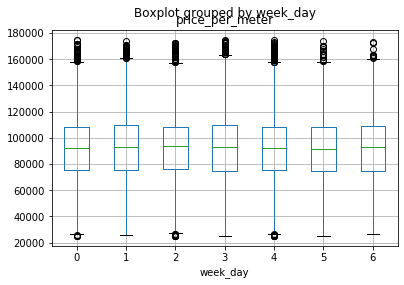

In [54]:
plot = standard_data.boxplot('price_per_meter', by = 'week_day')

В зависимости от дня недели стоимость метра колеблется незначительно.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


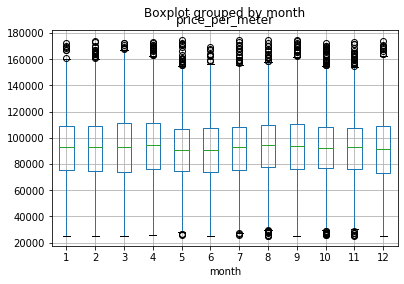

In [56]:
plot = standard_data.boxplot('price_per_meter', by = 'month')

Месяц размещения также не сильно влияет на стоимость.  
В мае-июне цена за метр опускается чуть ниже, в апреле поднимается чуть выше.  
Но в общем и целом без сильных скачков.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


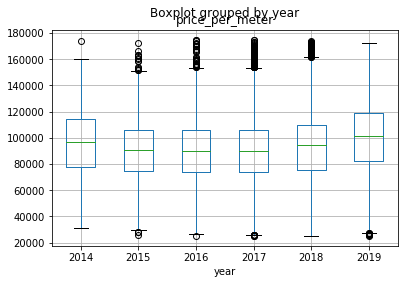

In [58]:
plot = standard_data.boxplot('price_per_meter', by = 'year')

А вот по годам стоимость за метр менялась заметно.  
С 2014 по 2016 год стоимость падала, а с 2017 по 2019 росла.  
В 2019 году стоимость метра перегнала стоимость 2014 года.

<font style="color:DeepPink; font-size:400%">•</font> Что можно сказать о цене квадратного метра в пригородах?

Выберем 10 населенных пунктов с наибольшим числом объявлений.

In [59]:
locality_data = (standard_data
    .pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'median'])
)
locality_data.columns = ['count', 'median']

locality_top10 = locality_data.sort_values('count', ascending=False)[0:10]
locality_top10

,count,median
locality_name,,
Санкт-Петербург,13359,"101,754.39"
посёлок Мурино,495,"84,239.13"
посёлок Шушары,433,"76,666.67"
Всеволожск,388,"65,789.47"
Пушкин,337,"98,471.99"
Колпино,334,"74,723.75"
посёлок Парголово,321,"91,917.59"
Гатчина,301,"67,924.53"
деревня Кудрово,279,"91,569.77"


In [61]:
filtered_data = standard_data.query('locality_name in @locality_top10.index')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


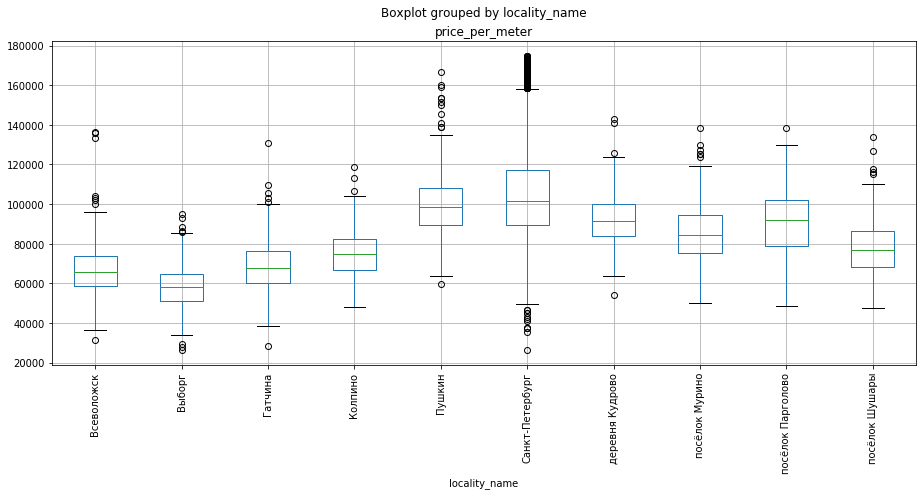

In [62]:
plot = filtered_data.boxplot('price_per_meter', by = 'locality_name', figsize=(15,6), rot=90)

Самая высокая стоимость квадратного метра в Санкт-Петербурге, самая низкая - в Выборге.  
При этом мы видим, что есть общая стоимость квадратного метра для всех населенных пунктов: от 65 до 85 тыс.за кв.м. за которую можно найти квартру в любом городе из топ 10.

<font style="color:Gold; font-size:400%">•</font> Выделим сегменты типичных квартир в центре и вне центра.

<font style="color:Gold; font-size:200%">•</font> Выше мы уже группировали данные на сегменты по удаленности от центра. Воспользуемся ими.

Нам нужно выбирать достаточно крупные сегменты с не менее 1000 объявлений.

In [63]:
center_data = standard_data.query('Centers_nearest_group == "0-6 км"')
len(center_data)

1651

In [64]:
not_center_data = standard_data.query('cityCenters_nearest > 6000')
len(not_center_data)

14086

In [67]:
corr_threshold = 0.5
(center_data
    .corr()[['price_per_meter']]              
    .query('abs(price_per_meter) > @corr_threshold') 
)

,price_per_meter
rooms,-0.50
living_area,-0.51
price_per_meter,1.00


In [68]:
corr_threshold = 0.5
(not_center_data
    .corr()[['price_per_meter']]              
    .query('abs(price_per_meter) > @corr_threshold') 
)

,price_per_meter
price_per_meter,1.00


<font style="color:Gold; font-size:200%">•</font> В центре сильная корреляция стоимости метра с числом комнат и жилой площадью.<br>Вне центра такого не наблюдается.

Корреляция Пирсона, это индикатор линейной зависимости. Хорошо бы еще проверить нелинейные зависимости при помощи графиков.

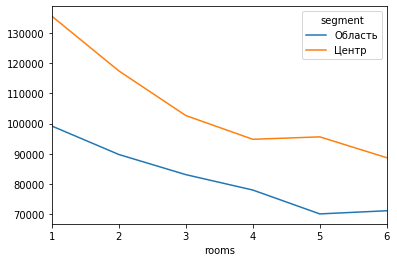

In [69]:
report = standard_data.copy()
report['segment'] = 'Область'
report.loc[report['cityCenters_nearest'] <= 6000, 'segment'] = 'Центр'

plot = (report.pivot_table(index= ['rooms', 'segment'], values = 'price_per_meter', aggfunc = 'median')
              .pivot_table(index= ['rooms'], columns = ['segment'])
              .droplevel(0, axis = 1)
              .plot())

На линейном графике можно заметить, что цена метра в центре в трешке сопоставима с ценой метра в однушке вне центра.  
С ростом количества комнат, стоимость за метр падает.

<font style="color:MediumVioletRed; font-size:400%">•</font> Подберем наиболее характерные параметры для апартаментов, студий и квартир свободной планировки.

In [70]:
not_standard_data = data.query('is_apartment == True | studio == True | open_plan == True')
len(not_standard_data)

266

In [71]:
not_standard_data[main_params].describe()

,rooms,cityCenters_nearest,total_area,last_price,price_per_meter,days_exposition,floor
count,266.00,172.00,266.00,266.00,266.00,240.00,266.00
mean,0.51,"13,730.01",40.54,"5,343,585.27","116,125.83",133.24,7.73
std,1.06,"7,252.13",44.97,"9,414,578.39","59,050.75",216.89,6.05
min,0.00,318.00,15.50,"945,750.00","34,375.00",3.00,1.00
25%,0.00,"9,223.25",25.00,"2,370,000.00","90,986.70",28.00,3.00
50%,0.00,"13,496.50",27.45,"3,100,000.00","106,238.55",51.00,6.00
75%,1.00,"17,133.00",32.95,"3,997,500.00","127,450.73",131.00,11.00
max,7.00,"54,490.00",507.00,"84,000,000.00","600,000.00","1,572.00",26.00


<font style="color:MediumVioletRed; font-size:200%">•</font> Посмотрим на стоимость квадратного метра.

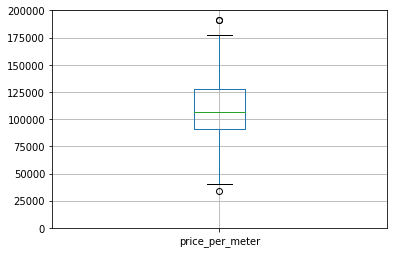

In [72]:
plt.ylim(0, 200000)
not_standard_data[['price_per_meter']].boxplot()

<font style="background-color:yellow">В характерный разброс попадают значения от 40 до 175 тыс.</font>

Пик стоимости, как и у типовых квартир приходится на 100 тыс. за кв.м..  
Основная масса продаваемых квартир сосредоточена между 50 и 175 тыс., у типовых квартир верхняя граница 250 тыс.

<font style="color:MediumVioletRed; font-size:200%">•</font> Проведем анализ площади продаваемых квартир.

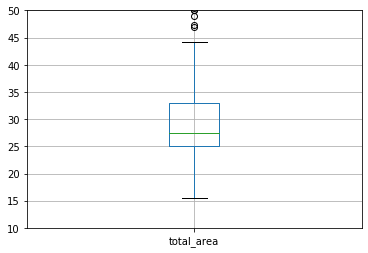

In [73]:
plt.ylim(10, 50)
not_standard_data[['total_area']].boxplot()

<font style="background-color:yellow">В характерный разброс попадают значения от 15 до 45 кв.м..</font>

<font style="color:MediumVioletRed; font-size:200%">•</font> Посмотрим, как долго обычно висит объявление о продаже.

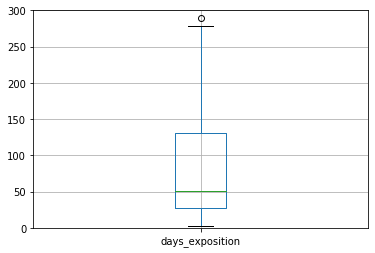

In [74]:
plt.ylim(0, 300)
not_standard_data[['days_exposition']].boxplot()

Нетиповые квартиры продаются в основном в течение 280 дней.

<font style="color:MediumVioletRed; font-size:200%">•</font> Посмотрим на распределение соотношения жилой площади к общей

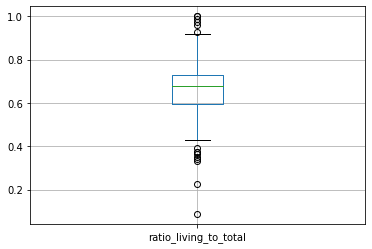

In [75]:
not_standard_data[['ratio_living_to_total']].boxplot()

Соотношения  находится в промежутке от 0,4 до 0,8.

In [76]:
not_standard_data_specific = not_standard_data.query('total_area > 15 & total_area < 45 & price_per_meter >= 40000 & \
price_per_meter <= 175000')
print('В нетиповой выборке осталось: {} квартир.'.format(len(not_standard_data_specific)))

В нетиповой выборке осталось: 213 квартир.


<font style="color:DarkTurquoise; font-size:400%">•</font> Сравним наиболее характерные параметры в не типовых и типовых квартирах.

In [77]:
not_standard_data_specific[main_params].describe()

,rooms,cityCenters_nearest,total_area,last_price,price_per_meter,days_exposition,floor
count,213.00,127.00,213.00,213.00,213.00,200.00,213.00
mean,0.12,"14,076.26",27.12,"2,883,706.16","106,760.76",109.36,8.60
std,0.34,"4,955.32",5.00,"835,828.26","24,885.48",160.27,6.31
min,0.00,"2,111.00",15.50,"945,750.00","48,133.24",3.00,1.00
25%,0.00,"12,100.50",24.05,"2,300,000.00","90,909.09",27.00,3.00
50%,0.00,"14,069.00",26.23,"2,700,000.00","105,058.37",45.00,7.00
75%,0.00,"16,788.00",29.00,"3,400,000.00","125,000.00",116.75,13.00
max,2.00,"29,846.00",44.20,"6,000,000.00","174,193.55",931.00,26.00


In [78]:
standard_data[main_params].describe() - not_standard_data_specific[main_params].describe()

,rooms,cityCenters_nearest,total_area,last_price,price_per_meter,days_exposition,floor
count,"20,622.00","15,610.00","20,622.00","20,622.00","20,622.00","18,121.00","20,622.00"
mean,1.82,"1,003.34",25.95,"1,979,139.65","-14,545.00",63.61,-2.68
std,0.54,"3,558.50",12.78,"1,316,508.60","2,361.74",50.42,-1.40
min,1.00,"-1,903.00",-2.50,"-195,750.00","-23,133.24",-2.00,0.00
25%,1.00,"-1,380.50",15.05,"1,080,888.50","-15,575.76",17.00,-1.00
50%,2.00,-378.00,23.47,"1,750,000.00","-12,201.22",47.00,-3.00
75%,3.00,-47.00,34.60,"2,590,000.00","-15,909.09",102.25,-5.00
max,4.00,"36,122.00",70.60,"5,999,000.00",739.07,649.00,7.00


<font style="color:DarkTurquoise; font-size:200%">•</font> Сравним цену метра в не типовых и типовых квартирах.

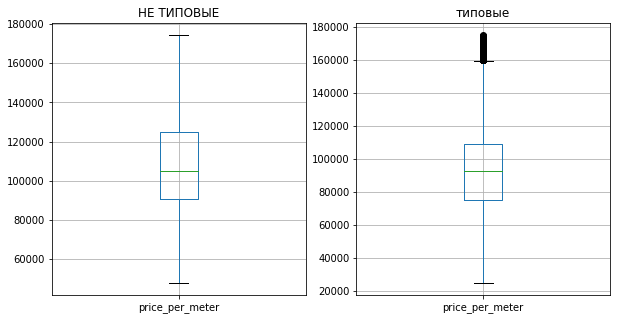

In [79]:
plt.subplots(figsize = (10, 5))
plot = (not_standard_data_specific[['price_per_meter']]
        .boxplot(ax = plt.subplot(1, 2, 1))
        .set_title('НЕ ТИПОВЫЕ')
       )
plot = (standard_data[['price_per_meter']]
        .boxplot(ax = plt.subplot(1, 2, 2))
        .set_title('типовые')
       )

Медианная цена за метр НЕ типовой квартиры 105 тыс, типовой - 93 тыс. Верхние и нижние границы распределения цены в не типовых квартирах также выше, чем в типовых.  

<font style="color:DarkTurquoise; font-size:200%">•</font> Сравним площади продаваемых квартир.

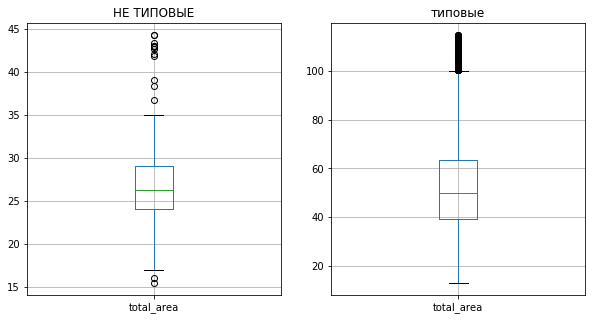

In [80]:
plt.subplots(figsize = (10, 5))
plot = (not_standard_data_specific[['total_area']]
        .boxplot(ax = plt.subplot(1, 2, 1))
        .set_title('НЕ ТИПОВЫЕ')
       )
plot = (standard_data[['total_area']]
        .boxplot(ax = plt.subplot(1, 2, 2))
        .set_title('типовые')
       )

Площадь не типовых квартир меньше, чем типовых.  
Весь характерный разброс типовых квартир уменьшается в первый квартиль (25%) характерного разброса площади типовых квартир. У 75% типовых квартир площадь больше, чем у не типовых.

<font style="color:DarkTurquoise; font-size:200%">•</font> Сравним как долго висят объявления о продаже.

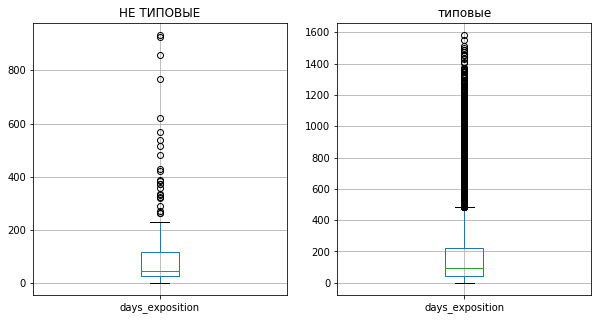

In [81]:
plt.subplots(figsize = (10, 5))
plot = (not_standard_data_specific[['days_exposition']]
        .boxplot(ax = plt.subplot(1, 2, 1))
        .set_title('НЕ ТИПОВЫЕ')
       )
plot = (standard_data[['days_exposition']]
        .boxplot(ax = plt.subplot(1, 2, 2))
        .set_title('типовые')
       )

Основная масса не типовых квартир продается до 200 дней, в то время, как 25% типовых квартир продаются дольше.

<font style="color:DarkTurquoise; font-size:200%">•</font> Сравним распределение соотношения жилой площади к общей.

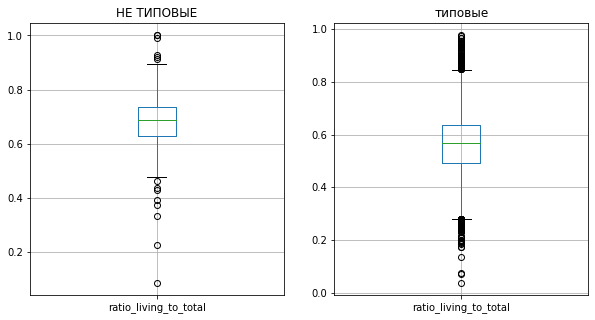

In [82]:
plt.subplots(figsize = (10, 5))
plot = (not_standard_data_specific[['ratio_living_to_total']]
        .boxplot(ax = plt.subplot(1, 2, 1))
        .set_title('НЕ ТИПОВЫЕ')
       )
plot = (standard_data[['ratio_living_to_total']]
        .boxplot(ax = plt.subplot(1, 2, 2))
        .set_title('типовые')
       )

В нетиповых квартирах медиана соотношения жилой площади к общей составляет - 0,69, а в типовых - 0,57.  
В не типовых квартирах порог - 0,5, в типовых - 0,3. При этом верхний примерно на одном уровне.  
Можно сделать вывод, что типовые квартиры комфортнее по соотношению жилой площади к общей площади квартиры.

<font style="color:DarkTurquoise; font-size:200%">•</font> Посмотрим на стоимость метра в зависимости от удаленности от центра

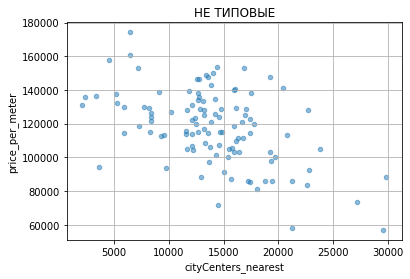

In [83]:
plot = (
    not_standard_data_specific.pivot_table(index = 'cityCenters_nearest', 
                              values = 'price_per_meter', 
                              aggfunc = 'median')
                 .reset_index()
                 .plot(x = 'cityCenters_nearest', 
                       y = 'price_per_meter', 
                       kind = 'scatter', 
                       alpha = 0.5, 
                       grid = True)
                 .set_title('НЕ ТИПОВЫЕ')
)

При удалении от центра стоимость квадратного метра постепенно уменьшается.  
Большой разброс цен наблюдается на любом расстоянии от центра города.

## Общий вывод.

In [84]:
standard_data[view_columns].describe()

,rooms,cityCenters_nearest,total_area,living_area,kitchen_area,last_price,price_per_meter,days_exposition,floor,ratio_living_to_total,ratio_kitchen_to_total
count,"20,835.00","15,737.00","20,835.00","19,236.00","19,058.00","20,835.00","20,835.00","18,321.00","20,835.00","19,236.00","19,058.00"
mean,1.93,"15,079.60",53.07,30.39,9.58,"4,862,845.82","92,215.77",172.97,5.92,0.56,0.19
std,0.88,"8,513.83",17.78,12.85,3.77,"2,152,336.85","27,247.22",210.69,4.91,0.10,0.07
min,1.00,208.00,13.00,2.00,1.30,"750,000.00","25,000.00",1.00,1.00,0.04,0.04
25%,1.00,"10,720.00",39.10,18.10,7.00,"3,380,888.50","75,333.33",44.00,2.00,0.49,0.14
50%,2.00,"13,691.00",49.70,29.20,9.00,"4,450,000.00","92,857.14",92.00,4.00,0.57,0.18
75%,3.00,"16,741.00",63.60,39.20,11.00,"5,990,000.00","109,090.91",219.00,8.00,0.63,0.23
max,6.00,"65,968.00",114.80,93.60,50.00,"11,999,000.00","174,932.61","1,580.00",33.00,0.98,0.79


<font style="color:DarkTurquoise; font-size:200%">•</font> **Портрет типовой квартиры:**  

Стоимость - 4,5 млн.  
Цена за метр - 93 тыс.  
Площадь - 50 кв.м.  
Жилая площадь - 29 кв.м. (отношение жилой пл.к общей - 0,57)  
Количество комнат - 2  
Этаж - 4  
Расстояние до центра - 14 км  
Объявление о продаже размещается в течение - 92 дней.

<font style="color:DarkTurquoise; font-size:200%">•</font> В наших данных были космически дорогие квартиры за 763 млн. и 12 тыс., площадью от 12 до 900 кв.м. С 19 комнатами. В 181 м и 66 км от центра.  
Эти крайности мы не изучали.

<font style="color:DarkTurquoise; font-size:200%">•</font> Изучали мы типовые варианты квартир.

**Выводы:**

- С увеличением числа комнат - стоимость за метр падает.  
- Первый и последний этажи стоят дешевле, чем другие.
- Чем дальше квартира от центра, тем дешевле стоит метр.  
- С 2014 по 2016 год стоимость за метр падала, а с 2017 по 2019 росла и в 2019 году стоимость метра перегнала стоимость 2014 года.

<font style="color:DarkTurquoise; font-size:200%">•</font> При расмотрении типичных квартир в центре и вне центра мы обнаружили сильную корреляцию стоимости метра с числом комнат и жилой площадью в центре.  
Вне центра такого не наблюдается.

<font style="color:DarkTurquoise; font-size:200%">•</font> Также мы изучили квартиры с не типовой планировкой: студии, апартаменты, квартиры со свободной планировкой и сравнили их с типовыми квартирами.

Цена за метр НЕ типовой выше, чем типовой.  
При этом площадь не типовых квартир меньше, чем типовых.  
И хотя не типовые квартиры продаются быстрее типовых, типовые квартиры комфортнее по соотношению жилой площади к общей площади квартиры.